## k means clustering 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# create a dataset 
X , y = make_blobs(n_samples=1000,n_features=2 , centers=3,random_state=42)

In [4]:
X # independent feature 

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]])

In [5]:
# convert it to dataframe 
x = pd.DataFrame(X,columns=['f1','f2'])
x.head()

,f1,f2
0,-6.596339,-7.139015
1,-6.137532,-6.580817
2,5.198206,2.049175
3,-2.968559,8.164442
4,-2.768789,7.511143


Text(0, 0.5, 'f2')

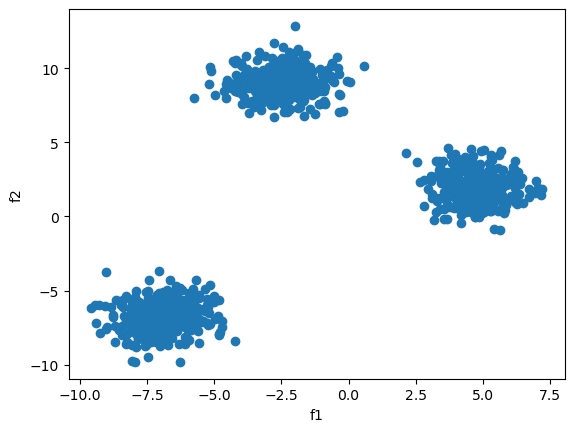

In [6]:
# plot the two features 
plt.scatter(x['f1'],x['f2'])
plt.xlabel('f1')
plt.ylabel('f2')

In [7]:
#ttrain test split 
from sklearn.model_selection import train_test_split

x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

## k means clsutering

In [8]:
from sklearn.cluster import KMeans

In [15]:
# k value find korte hbe
# elbow method 
wcss= []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k,init='k-means++') # model create 
    kmeans.fit(x_train)  # traine the model 
    wcss.append(kmeans.inertia_) #every k value r jonno wcss append korbo 

In [16]:
wcss

[44450.72387542039,
 12741.823357662126,
 1329.7219815435353,
 1161.021356199584,
 1006.9087823017242,
 852.144638635333,
 754.0851670893146,
 672.0439279655487,
 592.4261146436678]

Text(0, 0.5, 'wcss')

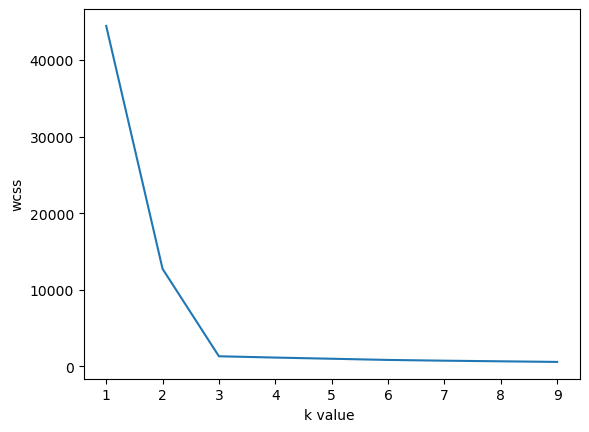

In [17]:
# plot a curve btw wcss and k 
# manually k bar korlm 
plt.plot(range(1,10) , wcss)
plt.xlabel('k value ')
plt.ylabel('wcss')

In [18]:
# from graph we can see that k = 3
# now we can create a model 
kmeans = KMeans(n_clusters=3,init='k-means++')

In [19]:
!pip install kneed

In [20]:
from kneed import KneeLocator

In [21]:
# object creaton 
kl = KneeLocator(range(1,10),wcss,curve='convex',direction='decreasing')


In [22]:
kl.elbow

3

In [25]:
# now elbow value is 3 ,
# now we can create a model 
kmeans = KMeans(n_clusters=3,init='k-means++')

y_train_label = kmeans.fit_predict(x_train)

y_test_label = kmeans.predict(x_test)

In [27]:
x_train

,f1,f2
703,3.452280,2.282990
311,-5.386939,-7.151233
722,4.633808,2.811660
629,-2.138052,8.410301
0,-6.596339,-7.139015
...,...,...
106,6.060383,1.402423
270,5.563906,1.788268
860,-1.994162,9.528072
435,4.683690,1.826168


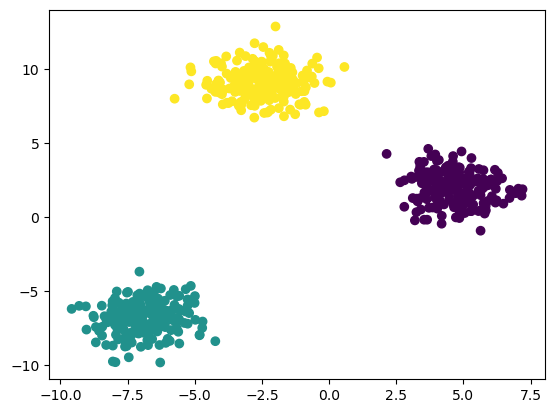

In [29]:
# now plot curve and color with label 
plt.scatter(x_train['f1'] , x_train['f2'] , c=y_train_label)

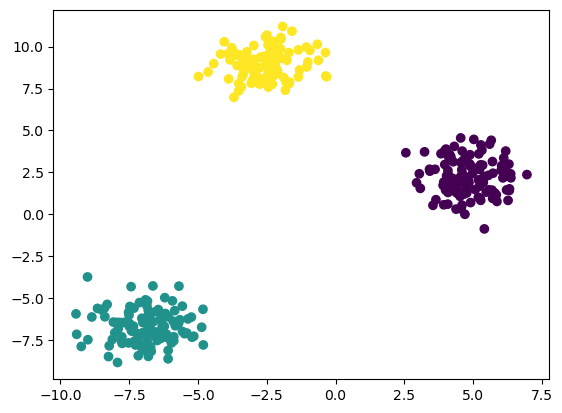

In [30]:
# now plot curve and color with label 
plt.scatter(x_test['f1'] , x_test['f2'] , c=y_test_label)

In [41]:
# performance -> silhute score 
from sklearn.metrics import silhouette_score

# each k value r jonno silhoutte score store korbo 
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train)
    score=silhouette_score(x_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [42]:
silhouette_coefficients

[0.7024009416893275,
 0.8417121581954964,
 0.6680583438195635,
 0.4860526980512637,
 0.33661643492616733,
 0.3378717697019301,
 0.3292612179319398,
 0.333026664743739,
 0.326532883548815]

Text(0, 0.5, 'score')

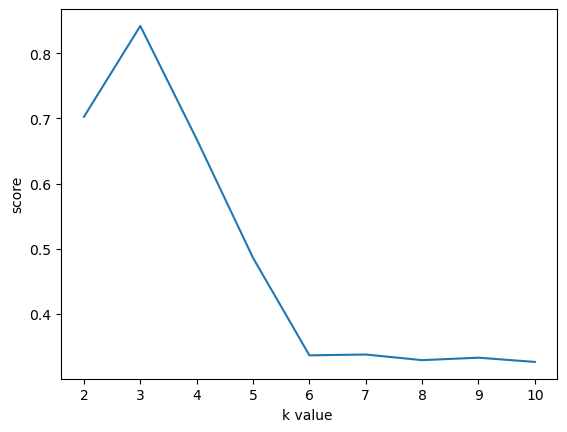

In [44]:
# plot a curve btw wcss and k 
# manually k bar korlm 
plt.plot(range(2,11) , silhouette_coefficients)
plt.xlabel('k value ')
plt.ylabel('score')